# <span style="color:red"><center>Construcción automática de texto </center></span>

<center>Introducción</center>

<figure>
<center>
<img src="../Imagenes/text_generation_sampling.png" width="800" height="600" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Muestreo  de palabras</p>
</figcaption>
</figure>

Fuente: [Text generation with an RNN](https://www.tensorflow.org/tutorials/text/text_generation)

##   <span style="color:blue">Referencias</span>

1. Basado en el blog de laurencemoroney: (https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt)

##   <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Datos](#Datos)
* [Preprocesamiento](#Preprocesamiento)
* [Librerías](#Librerías)
* [Lee los datos](#Lee-los-datos)
* [Tokeniza el texto](#Lee-los-datos)
* [Crea n-Grams para datos de entrenamiento y etiquetas](#Crea-n-Grams-para-datos-de-entrenamiento-y-etiquetas)
* [Crea-el-modelo](#Crea-el-modelo)
* [Genera-texto-automáticamente](#Genera-texto-automáticamente)

In [108]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.19.0


In [109]:
!pip install tensorflow

In [110]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [111]:
!pip3 install "numpy<2.0.0"

##   <span style="color:blue">Introducción</span>

Gran conjunto de datos basado en sonetos de Shekespeare.


##   <span style="color:blue">Librerías</span>


In [112]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
import numpy as np 

from tensorflow.keras.utils import plot_model

## <span style="color:blue">Lee los datos</span>

In [113]:
# !wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#    -O /tmp/sonnets.txt
# data = open('../sonnets/sonnets.txt').read()
data = open('sonnets/sonnets.txt').read()

corpus = data.lower().split("\n")

## <span style="color:blue">Tokeniza el texto</span>


In [114]:
tokenizer = Tokenizer()

corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#print('Dictionary: ',tokenizer.word_index,'\n')
print('índice de rage = ',tokenizer.word_index['rage'])
print('\nTNúmero total d palabras en el Tokenizador (+OOV) =',total_words,'\n')

# Muestra parte del corpus
print('Primeras líneas del corpus: \n')
corpus[0:10]

índice de rage =  444

TNúmero total d palabras en el Tokenizador (+OOV) = 3375 

Primeras líneas del corpus: 



['\tsonnets',
 '',
 '',
 '',
 'to the only begetter of',
 'these insuing sonnets',
 'mr. w. h. all happiness',
 'and that eternity',
 'promised by',
 'our ever-living poet wisheth']

## <span style="color:blue">Crea n-Grams para datos de entrenamiento y etiquetas</span>


In [115]:
# crear secuencias de entrada usando una lista de tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        
print('input_sequences[0:10] = ',input_sequences[:10],'\n')

# Determine el n-gram más largo
max_seq_test_len = max([len(x) for x in input_sequences])
print('\nlongitud del  n-grama más largo:',max_seq_test_len)


input_sequences[0:10] =  [[3, 2], [3, 2, 313], [3, 2, 313, 1375], [3, 2, 313, 1375, 4], [118, 1376], [118, 1376, 878], [1377, 1378], [1377, 1378, 1379], [1377, 1378, 1379, 23], [1377, 1378, 1379, 23, 1380]] 


longitud del  n-grama más largo: 11


### ¿Qué hizo tokenizer?

In [116]:
line = corpus[0]
token_list = tokenizer.texts_to_sequences([line])
print(line)
print(token_list)
print(token_list[0])

	sonnets
[[878]]
[878]


### Agrega PAD para tener secuencias de la misma longitud

In [117]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# crea predictores y etiqueta
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

#

In [118]:
print(input_sequences.shape)
print(predictors.shape)
print(label.shape)

(15484, 11)
(15484, 10)
(15484,)


In [119]:
print(len(predictors))
print(len(label))

15484
15484


In [120]:
print(input_sequences[0:3]) # secuencia completa
print('\n')
print(predictors[0:3]) # secuencia hasta el anterior al último
print('\n')
print(label[0:3]) # el último de la secuencia

[[   0    0    0    0    0    0    0    0    0    3    2]
 [   0    0    0    0    0    0    0    0    3    2  313]
 [   0    0    0    0    0    0    0    3    2  313 1375]]


[[  0   0   0   0   0   0   0   0   0   3]
 [  0   0   0   0   0   0   0   0   3   2]
 [  0   0   0   0   0   0   0   3   2 313]]


[   2  313 1375]


### Covierte etiquetas a 1-hot

In [121]:
label = to_categorical(label, num_classes=total_words)
print(label.shape)

(15484, 3375)


<figure>
<center>
<img src="../Imagenes/bidirectiona_LSTM.png" width="700" height="500" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Bidirectional LSTM</p>
</figcaption>
</figure>


<figure>
<center>
<img src="../Imagenes/dropout-keras.png" width="500" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Dropout Layer</p>
</figcaption>
</figure>


## <span style="color:blue">Crea el modelo</span>

In [122]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
#This line adds a bidirectional LSTM layer to the model with 150 units and return_sequences=True. 
#The bidirectional layer processes the input sequence in both forward and backward directions.
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words//2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [123]:
model.build()
print(model.summary())
plot_model(model, to_file='/Imagenes/sonetos.png', 
           show_shapes=True)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
You must install pydot (`pip install pydot`) for `plot_model` to work.


## <span style="color:blue">Entrena</span>

In [124]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 34s 64ms/step - accuracy: 0.0236 - loss: 7.3389
Epoch 2/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.0240 - loss: 6.5221
Epoch 3/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.0265 - loss: 6.3811
Epoch 4/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - accuracy: 0.0270 - loss: 6.2717
Epoch 5/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 33s 68ms/step - accuracy: 0.0333 - loss: 6.1871
Epoch 6/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 33s 68ms/step - accuracy: 0.0379 - loss: 6.1207
Epoch 7/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.0381 - loss: 6.0544
Epoch 8/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - accuracy: 0.0399 - loss: 5.9836
Epoch 9/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.0461 - loss: 5.8886
Epoch 10/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 32s 67ms/step - accuracy: 0.0481 - loss: 5.8069
Epoch 11/100
484/484 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.0536 - loss: 5.7116
Epoch 12/100
484/48

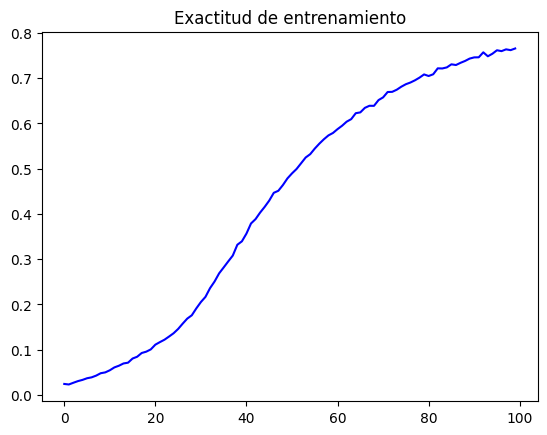

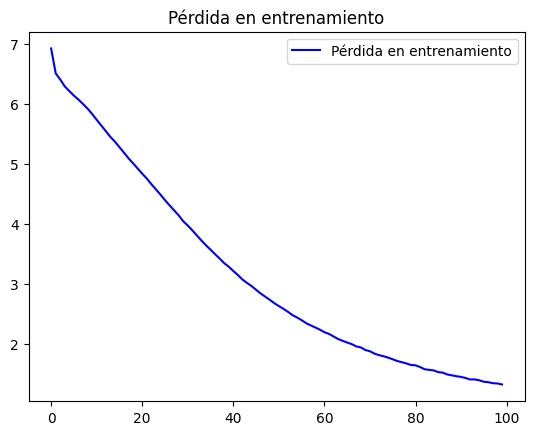

In [128]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Exactitud de entrenamiento')
plt.title('Exactitud de entrenamiento')

plt.figure()

plt.plot(epochs, loss, 'b', label='Pérdida en entrenamiento')
plt.title('Pérdida en entrenamiento')
plt.legend()

plt.show()

## <span style="color:blue">Genera texto automáticamente</span>

In [129]:
seed_text = "Who are you, so too cruel?"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    #predicted = (model.predict(token_list) > 0.5).astype("int32")
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━